In [1]:
import numpy as np 
import randomname
import networkx as nx
from string import ascii_lowercase
import matplotlib.pyplot as plt

In [2]:
def gen_town_name(): 
    '''Generates a random name with the use of randomname'''
    return randomname.get_name()

In [3]:
def plot_road_map(graph, seed=5, route=None, start_end=None): 
    '''Plots a WEIGHTED graph with roads and towns labelled'''
    # Use the seed to have the same graph layout every time 
    pos = nx.spring_layout(graph, seed=seed)  
    # Draw towns
    nx.draw_networkx_nodes(graph, pos, node_size=700)
    # Draw roads 
    nx.draw_networkx_edges(graph, pos, width=6)
    
    # town labels
    nx.draw_networkx_labels(graph, pos, font_size=20, font_family="sans-serif")
    # road distances 
    edge_labels = nx.get_edge_attributes(graph, "dist")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels)

    if route: 
        nx.draw_networkx_edges(graph, pos, edgelist=route, width=6, edge_color="r")
        nx.draw_networkx_edge_labels(graph, pos, get_route_lables(route, edge_labels), font_color="r")
    
    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    if start_end: 
        plt.title(f'Shortest path from {start_end[0]} to {start_end[1]}')
    else: 
        plt.title(f'The graph')
    plt.tight_layout()
    plt.show()

In [4]:
def get_shortest_route(graph, start, end): 
    '''Finds the shortest path and returns a list of edges'''
    nodes = nx.shortest_path(graph, source=start, target=end, weight='dist') 
    return [(nodes[i], nodes[i+1]) for i in range(len(nodes)-1)]

In [5]:
def get_route_lables(route: list, r_dict: dict):
    route_labels = {}
    for edge in route: 
        for key, value in r_dict.items():
            if edge[0] in key and edge[1] in key: 
                route_labels[key] = value
    return route_labels

In [12]:
# Generate all the town nodes
road_network = nx.Graph()
town_list = []
num_towns = 15

for i in range(num_towns): 
    # new_town = [id, town name, population] the structure
    new_town = [ascii_lowercase[i], gen_town_name(), np.random.randint(500, 10000)]
    town_list.append(new_town)
    road_network.add_node(new_town[0], name=new_town[1], pop=new_town[2])

In [13]:
town_list

[['a', 'spatial-trie', 9904],
 ['b', 'advanced-developer', 2710],
 ['c', 'thick-dark', 9486],
 ['d', 'congruent-tostada', 3880],
 ['e', 'rosy-bag', 3760],
 ['f', 'livid-haddock', 3443],
 ['g', 'wary-mulberry', 2076],
 ['h', 'quadratic-wash', 1173],
 ['i', 'bold-slur', 5136],
 ['j', 'asphalt-cabin', 3345],
 ['k', 'lazy-basin', 7647],
 ['l', 'compact-file', 8989],
 ['m', 'binary-carp', 5249],
 ['n', 'tough-stain', 4963],
 ['o', 'eager-laminate', 8431]]

In [14]:
# Iteration 1 
# adding edges to all nodes to ensure all towns are connected
# Distances are random
for town in town_list: 
    rand_end_node = town_list[np.random.randint(0, len(town_list)-1)][0]
    if rand_end_node == town[0]: # overwrite the town if it is the same one (another random selection shoudld solve the collision)
        rand_end_node = town_list[np.random.randint(0, len(town_list)-1)][0]
    road_network.add_edge(town[0], rand_end_node, dist=np.random.randint(5, 200))

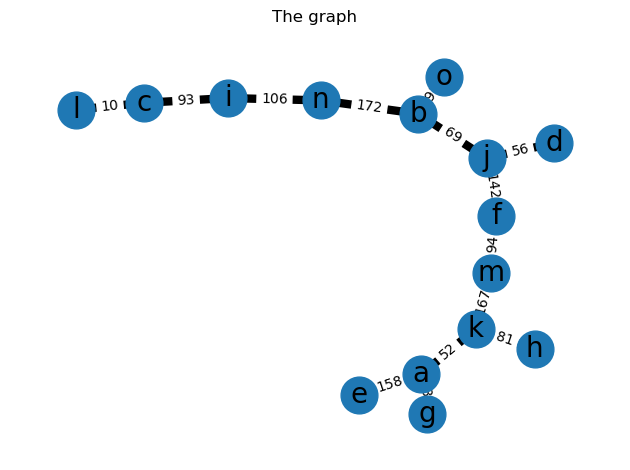

In [15]:
plot_road_map(road_network)

In [16]:
# Iteration 2: 
# adding extra roads that are not parallel to existing once 
# This includes a lot of safety checks
# Final number of edges = 1.5 x town count 
for i in range(int(np.floor((len(town_list)-1)*0.5))): 
    stop = 0
    added_road = False
    while stop < 10: # Try 10 times to add a random road, just a safety thing
        rand_start_node = town_list[np.random.randint(0, len(town_list)-1)][0]
        rand_end_node = town_list[np.random.randint(0, len(town_list)-1)][0]
        if rand_start_node == rand_end_node: 
            break
        stop += 1
        for road in list(road_network.edges()): 
            if rand_start_node in road and rand_end_node in road:
                # print('Double road...')
                break
            else: 
                added_road = True
                road_network.add_edge(rand_start_node, rand_end_node, dist=np.random.randint(5, 200))
                # print('Adding new road')
                break
        if added_road == True: 
            break
        # print(f'Stop val: {stop}')
    # print('Next road')
        

        

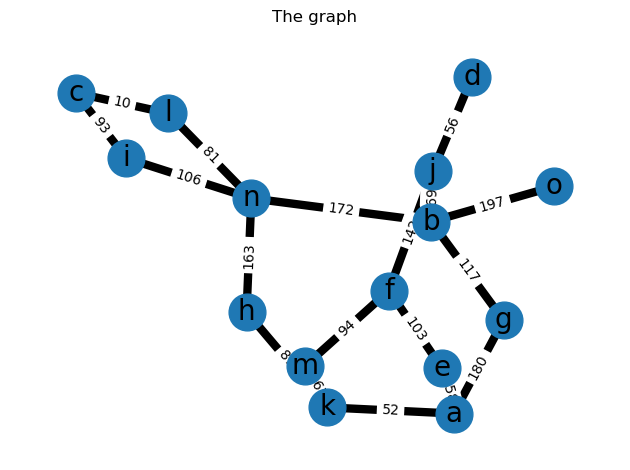

In [17]:
plot_road_map(road_network)

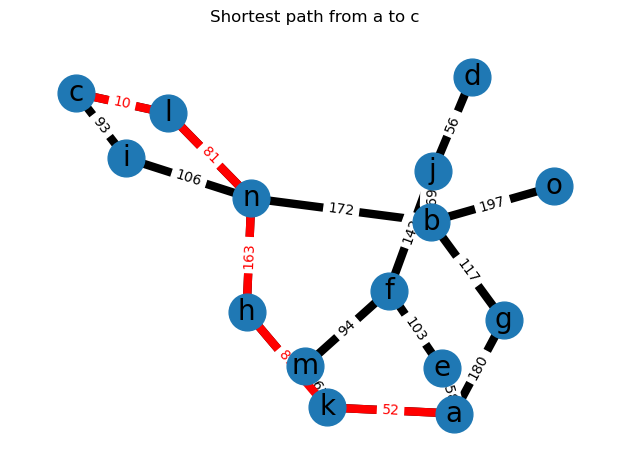

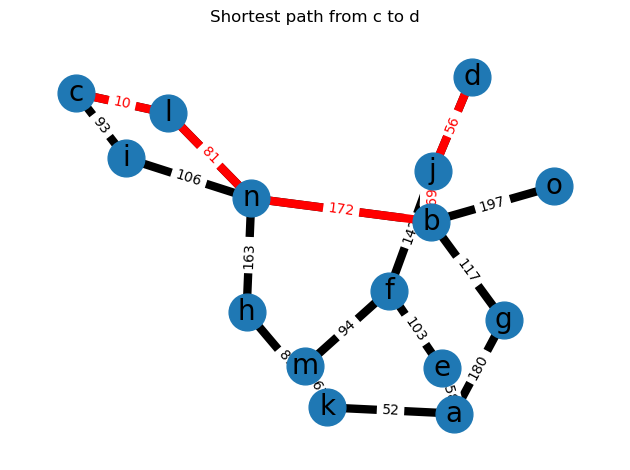

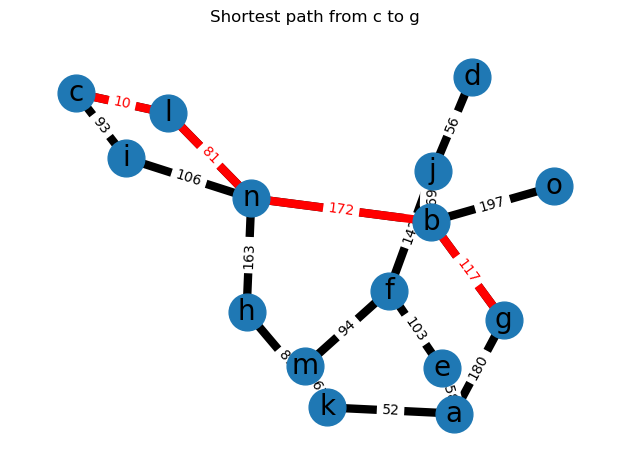

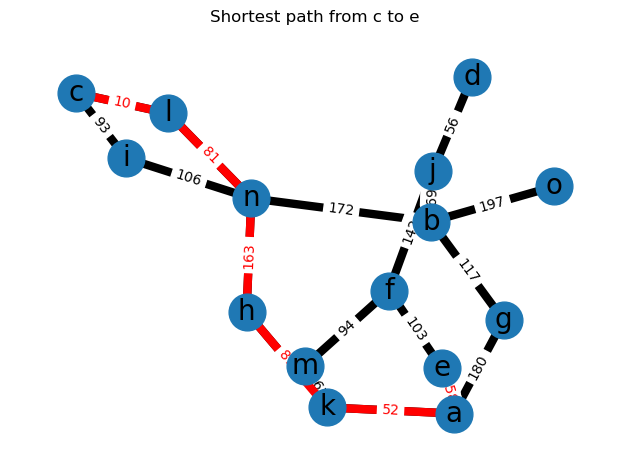

In [21]:
# Finding and plotting the shortest paths
plot_road_map(road_network, route=get_shortest_route(road_network, 'c', 'a'), start_end=['a', 'c'])
plot_road_map(road_network, route=get_shortest_route(road_network, 'c', 'd'), start_end = ['c', 'd'])
plot_road_map(road_network, route=get_shortest_route(road_network, 'c', 'g'), start_end = ['c', 'g'])
plot_road_map(road_network, route=get_shortest_route(road_network, 'c', 'e'), start_end = ['c', 'e'])